## This Notebook is the part of Georgetown University Data Science Project - Team Ship Happen
## Purpose of this notebook is Data Ingetion and Wrangling

### Data Set Information:
We have used publicly available data Marine Casualty and Pollution Database from Marine Information for Safety and Law Enforcement (MISLE) site (https://www.marad.dot.gov/resources/data-statistics/).

First we downloaded data from www.marad.dot.gov sit and uploaded data into Postgres Database (WRAM data storage). In Postgres database we do necessary analysis and join the table to produce raw dataset to use our project. Finaly we make text file and store it in our project location.

This data file contains details of Marine Incident Information, this is a tab separated file with encode utf-8.
Below tables we have used to extract data from database-

1. MisleVessel
2. MisleActivity
3. MisleInjury

After joining these table we have 1353830 instances


### Attribute Information - Raw Dataset:
activity_id, gk_d_vessel, vessel_id, gross_ton, vlength, vdepth, vessel_class, vessel_age, flag_abbr, route_type, mvaccident,  incident_yr, incident_mo, incident_dy, accident_type, casualty_type_desc.


#### After Wrangling we have got 260474 instances:

### Attribute Information - Final Dataset:
gross_ton, vlength, vdepth, vessel_class, vessel_age, route_type, mvaccident.


### Import required libraries

In [16]:
%matplotlib inline

import os                                    # For accessing operating system functionalities

# Libraries that can be pip installed
import pandas as pd                          # Library for building dataframes
import matplotlib.pyplot as plt  

### Data Exploration 
In this section we will begin to load data from text file into panda dataframe and explore the dataset to get relevant information.

In [17]:
incident = pd.read_csv(os.path.abspath('mvinjury.txt'), sep='\t')

C:\Users\spaul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
incident.head()

,activity_id,fk_d_vessel,vessel_id,gross_ton,vlength,vdepth,vessel_class,vessel_age,flag_abbr,route_type,mvaccident,incident_yr,incident_mo,incident_dy,accident_type,casualty_type_desc
0,177274.0,7400000.0,492213.0,77104.0,739.2,26.2,Passenger Ship,16.0,BS,Oceans,1,2001,5,19,Unknown Injury Type,Injured
1,1480793.0,8739036.0,453758.0,78878.0,915.2,52.0,Passenger Ship,18.0,BS,Oceans,1,2001,12,8,Other Injury Type,Injured
2,1480838.0,0.0,NaN,NaN,NaN,NaN,UNSPECIFIED,NaN,,UNSPECIFIED,1,2001,12,8,Contact Injury- Collision with Fixed Object,Injured
3,1482417.0,0.0,NaN,NaN,NaN,NaN,UNSPECIFIED,NaN,,UNSPECIFIED,1,2000,10,28,Noncontact Injury- Burn,Injured
4,1673222.0,8302850.0,62437.0,159.0,89.3,12.0,Recreational,70.0,US,UNSPECIFIED,1,2002,8,2,Noncontact Injury- Asphyxiation,Injured


In [19]:
print("{} instances with {} features\n".format(*incident.shape))

1353830 instances with 16 features



In [20]:
#Few features have been droped to make it simple
incident.drop('vessel_id', axis=1, inplace=True)
incident.drop('incident_dy', axis=1, inplace=True)
incident.drop('activity_id', axis=1, inplace=True)
incident.drop('fk_d_vessel', axis=1, inplace=True)
incident.drop('flag_abbr', axis=1, inplace=True)
incident.drop('incident_yr', axis=1, inplace=True)
incident.drop('incident_mo', axis=1, inplace=True)
incident.drop('accident_type', axis=1, inplace=True)
incident.drop('casualty_type_desc', axis=1, inplace=True)

In [21]:
# Duplicates records have been deleted 
incident.drop_duplicates(keep=False, inplace=True)

In [22]:
print("{} instances with {} features\n".format(*incident.shape))

260364 instances with 7 features



In [23]:
incident.head()

,gross_ton,vlength,vdepth,vessel_class,vessel_age,route_type,mvaccident
4,159.0,89.3,12.0,Recreational,70.0,UNSPECIFIED,1
6,0.0,250.0,10.5,Barge,65.0,UNSPECIFIED,1
15,9876.0,459.8,36.2,Barge,22.0,Oceans,1
134,1830.0,284.0,11.2,Barge,53.0,"Lakes, Bays, and Sounds",1
448,1983.0,209.5,12.5,Offshore,35.0,UNSPECIFIED,1


In [24]:
# Vessel count - group by vessel class
incident['vessel_class'].head()
print(incident.groupby('vessel_class')['vessel_class'].count())

vessel_class
Barge                        8848
Bulk Carrier                 7627
Fishing Vessel              44944
General Dry Cargo Ship      15316
Miscellaneous Vessel         7739
Offshore                     2186
Passenger Ship              20887
Recreational               125386
Refrigerated Cargo Ship       568
Research Ship                 978
Ro-Ro Cargo Ship             1074
School Ship                   186
Tank Ship                    8348
Towing Vessel                9678
UNSPECIFIED                  6255
Warship                       344
Name: vessel_class, dtype: int64


In [25]:
incident.describe()

C:\Users\spaul\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,gross_ton,vlength,vdepth,vessel_age,mvaccident
count,260364.000000,259299.000000,250634.000000,225650.000000,260364.000000
mean,3875.659408,117.381935,10.456240,37.365726,1.985117
std,14987.333859,264.584584,153.378647,107.503918,0.121085
min,0.000000,0.000000,0.000000,-18097.000000,1.000000
25%,10.000000,NaN,NaN,NaN,2.000000
50%,20.000000,NaN,NaN,NaN,2.000000
75%,80.000000,NaN,NaN,NaN,2.000000
max,790184.000000,79383.000000,58395.000000,2015.000000,2.000000


In [26]:
# Missing value replace with mean value
incident.fillna(value={'vlength': incident['vlength'].mean()}, inplace=True)
incident.fillna(value={'vdepth': incident['vdepth'].mean()}, inplace=True)
incident.fillna(value={'vessel_age': incident['vessel_age'].mean()}, inplace=True)

,gross_ton,vlength,vdepth,vessel_class,vessel_age,route_type,mvaccident
4,159.0,89.3,12.0,Recreational,70.000000,UNSPECIFIED,1
6,0.0,250.0,10.5,Barge,65.000000,UNSPECIFIED,1
15,9876.0,459.8,36.2,Barge,22.000000,Oceans,1
134,1830.0,284.0,11.2,Barge,53.000000,"Lakes, Bays, and Sounds",1
448,1983.0,209.5,12.5,Offshore,35.000000,UNSPECIFIED,1
516,9.0,37.0,3.2,Fishing Vessel,30.000000,UNSPECIFIED,1
567,94.0,77.7,11.3,Towing Vessel,61.000000,UNSPECIFIED,1
597,6577.0,424.5,32.8,General Dry Cargo Ship,37.365726,UNSPECIFIED,1
645,127.0,65.0,9.0,Towing Vessel,17.000000,UNSPECIFIED,1
795,73.0,95.8,10.1,Towing Vessel,32.000000,UNSPECIFIED,1


In [13]:
incident.describe()

,gross_ton,vlength,vdepth,vessel_age,mvaccident
count,260364.000000,260364.000000,260364.00000,260364.000000,260364.000000
mean,3875.659408,117.381935,10.45624,37.365726,1.985117
std,14987.333859,264.042896,150.48541,100.080937,0.121085
min,0.000000,0.000000,0.00000,-18097.000000,1.000000
25%,10.000000,33.500000,4.50000,24.000000,2.000000
50%,20.000000,41.800000,6.20000,37.000000,2.000000
75%,80.000000,69.000000,8.80000,43.000000,2.000000
max,790184.000000,79383.000000,58395.00000,2015.000000,2.000000


In [27]:
import seaborn as sns
data = sns.load_dataset("incident")
data = data.pivot("vessel_class", "route_type", "mvaccident")
ax = sns.heatmap(data)


HTTPError: HTTP Error 404: Not Found

In [14]:
# Categorical value conversion into numerical vaule

vessel_class_MAP = {
    "Barge" : 1,
    "Bulk Carrier" : 2,
    "Fishing Vessel" : 3,
    "General Dry Cargo Ship" : 4,
    "Miscellaneous Vessel" : 5,
    "Offshore" : 6,
    "Passenger Ship" : 7,
    "Recreational" : 8,
    "Refrigerated Cargo Ship" : 9,
    "Research Ship" : 10,
    "Ro-Ro Cargo Ship" : 11,
    "School Ship" : 12,
    "Tank Ship" : 13,
    "Towing Vessel" : 14,
    "UNSPECIFIED" : 15,
    "Warship" : 16
}
routetype_MAP = {
    "Coastwise" : 1,
    "Coastwise and Great Lakes" : 2,
    "Great Lakes" : 3,
    "Lakes, Bays, and Sounds" : 4,
    "Lakes, Bays, and Sounds plus Limited Coastwise" : 5,
    "Lakes, Bays, and Sounds plus Limited Great Lakes" : 6,
    "Oceans" : 7,
    "Rivers" : 8,
    "Rivers plus Limited Great Lakes" : 9,
    "UNSPECIFIED" : 10,
}

# Convert vessel_class into interget
for a, b in vessel_class_MAP.items():
    incident.ix[incident.vessel_class == a, 'vessel_class'] = b
# Convert route_type into interget
for a, b in routetype_MAP.items():
    incident.ix[incident.route_type == a, 'route_type'] = b


In [17]:
# clean data save in a file for using feature selection
incident.to_csv('mvinjury_data.txt', header=True, sep='\t', index=False)

### Histogram
Vessel age distribution

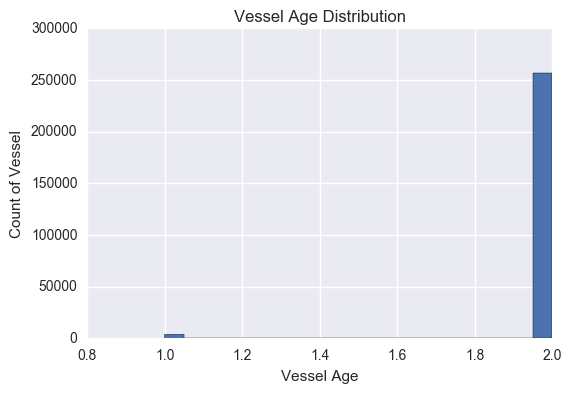

In [61]:
# Visualize the vessel age distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(incident['mvaccident'], bins = 20, range = (incident['mvaccident'].min(),incident['mvaccident'].max()))
plt.title('Vessel Age Distribution')
plt.xlabel('Vessel Age')
plt.ylabel('Count of Vessel')
plt.show()
plt.savefig('Vessel_age_dist.png')

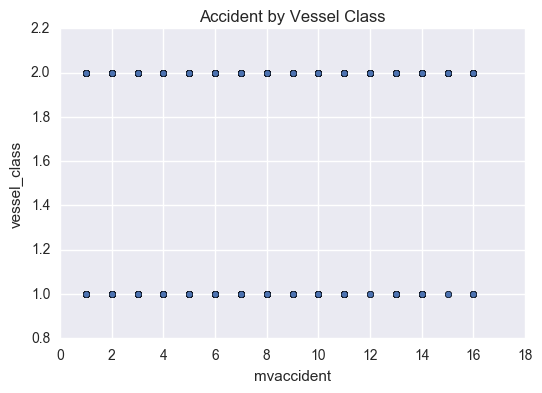

In [63]:
df.plot(x='vessel_class', y='mvaccident', kind='scatter')
plt.title('Accident by Vessel Class')
plt.xlabel('mvaccident')
plt.ylabel('vessel_class')
plt.show()

## Scatter Matrix
The scatter matrix allows us to identify correlations between pairs of dimensions in a matrix form.

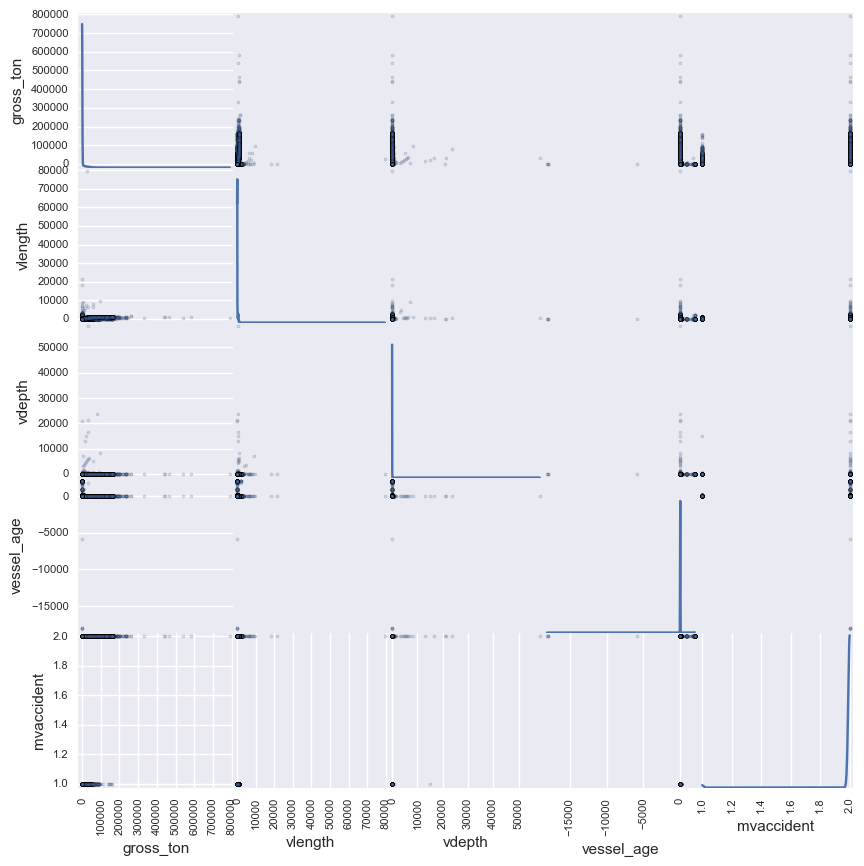

In [54]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(incident, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

## RadViz
Once you move into attempting to visualize more than three dimensions, things get a bit tricky. The radviz plot attempts to create clusters of points by pulling them towards an outer ring.

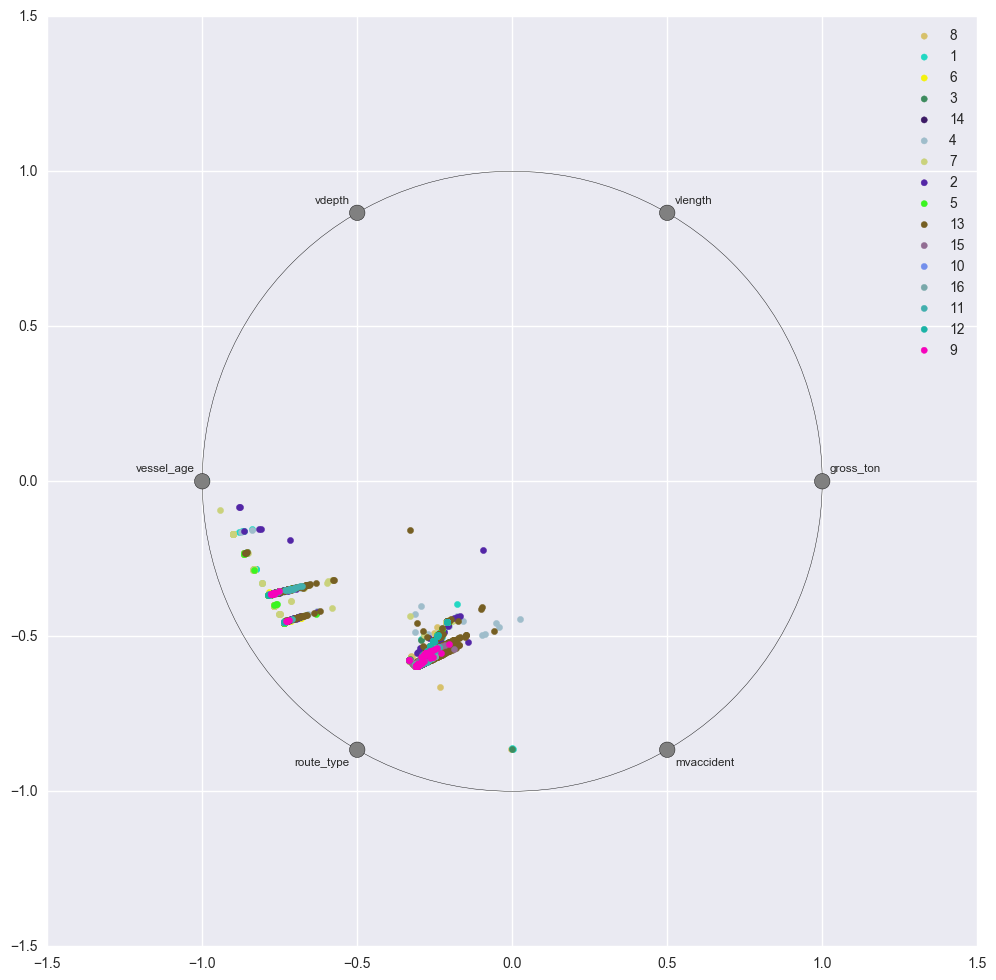

In [53]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(incident, 'vessel_class')
plt.show()

## Parallel Coordinates
Parallel coordinates intend to do the same thing as the radviz, but instead of having a circle with the dimensions, extend those dimensions out along the horizontal access.

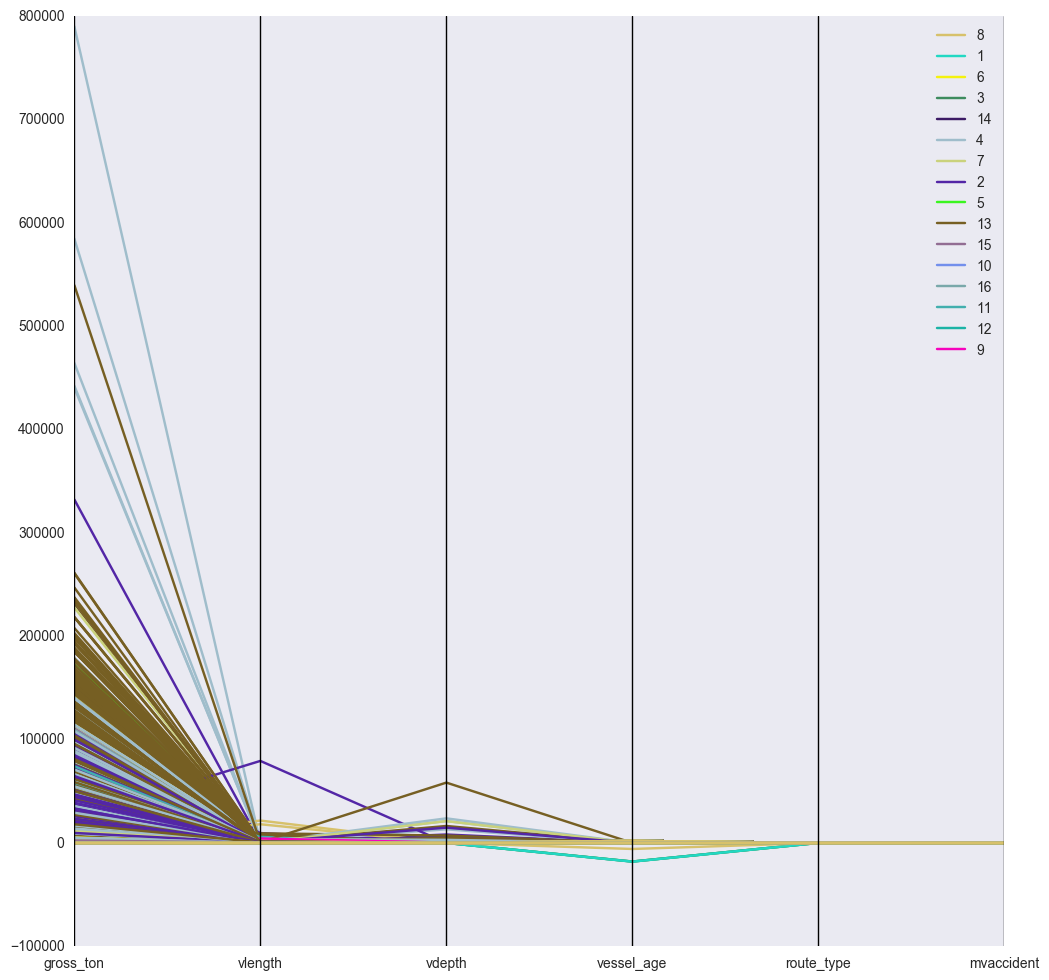

In [56]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(incident, 'vessel_class')
plt.show()